<a href="https://colab.research.google.com/github/marjph/FTW-Day-7/blob/master/FTW_Day_7_HW_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv("credit_card_clustering.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 18)

In [5]:
data['CUST_ID'].nunique()

8950

In [6]:
data['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [0]:
data=data.fillna(0)

In [8]:
data['CREDIT_LIMIT'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      4493.947277
std       3638.922543
min          0.000000
10%       1200.000000
20%       1500.000000
30%       2000.000000
40%       2500.000000
50%       3000.000000
60%       4200.000000
70%       6000.000000
80%       7000.000000
90%       9500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

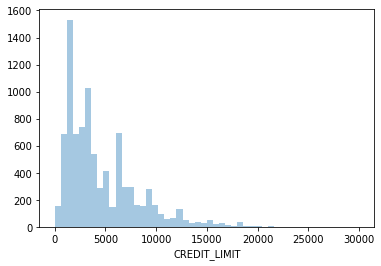

In [9]:
sns.distplot(data['CREDIT_LIMIT'], kde=False)

In [10]:
data['TENURE'].describe(np.arange(0.1, 1, 0.1))

count    8950.000000
mean       11.517318
std         1.338331
min         6.000000
10%        10.000000
20%        12.000000
30%        12.000000
40%        12.000000
50%        12.000000
60%        12.000000
70%        12.000000
80%        12.000000
90%        12.000000
max        12.000000
Name: TENURE, dtype: float64

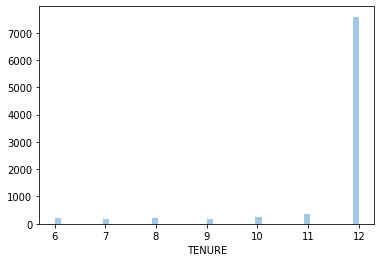

In [11]:
sns.distplot(data['TENURE'], kde=False)

In [12]:
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

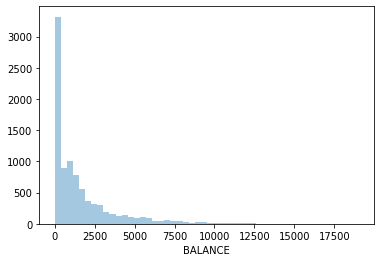

In [13]:
sns.distplot(data['BALANCE'], kde=False)

In [14]:
data['PURCHASES'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
10%          0.000000
20%          0.000000
30%         89.285000
40%        212.850000
50%        361.280000
60%        557.546000
70%        894.316000
80%       1422.438000
90%       2542.624000
max      49039.570000
Name: PURCHASES, dtype: float64

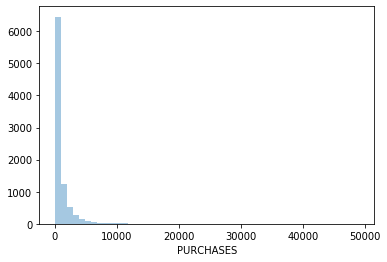

In [15]:
sns.distplot(data['PURCHASES'], kde=False)

In [0]:
from sklearn.cluster import KMeans

In [0]:
features = ['CREDIT_LIMIT','BALANCE','PURCHASES']
X = data[features]

In [18]:
X.head()

,CREDIT_LIMIT,BALANCE,PURCHASES
0,1000.0,40.900749,95.40
1,7000.0,3202.467416,0.00
2,7500.0,2495.148862,773.17
3,7500.0,1666.670542,1499.00
4,1200.0,817.714335,16.00


In [0]:
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)


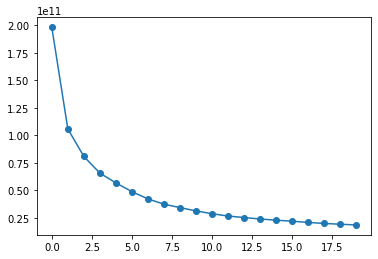

In [20]:
plt.plot(squared_errors, marker = 'o')

In [0]:
km = KMeans(n_clusters=5, random_state=42)

km.fit(X)

labels = km.predict(X)

new_data = X.copy()

new_data['labels'] = labels

In [24]:
new_data.head()

,CREDIT_LIMIT,BALANCE,PURCHASES,labels
0,1000.0,40.900749,95.40,1
1,7000.0,3202.467416,0.00,3
2,7500.0,2495.148862,773.17,3
3,7500.0,1666.670542,1499.00,3
4,1200.0,817.714335,16.00,1


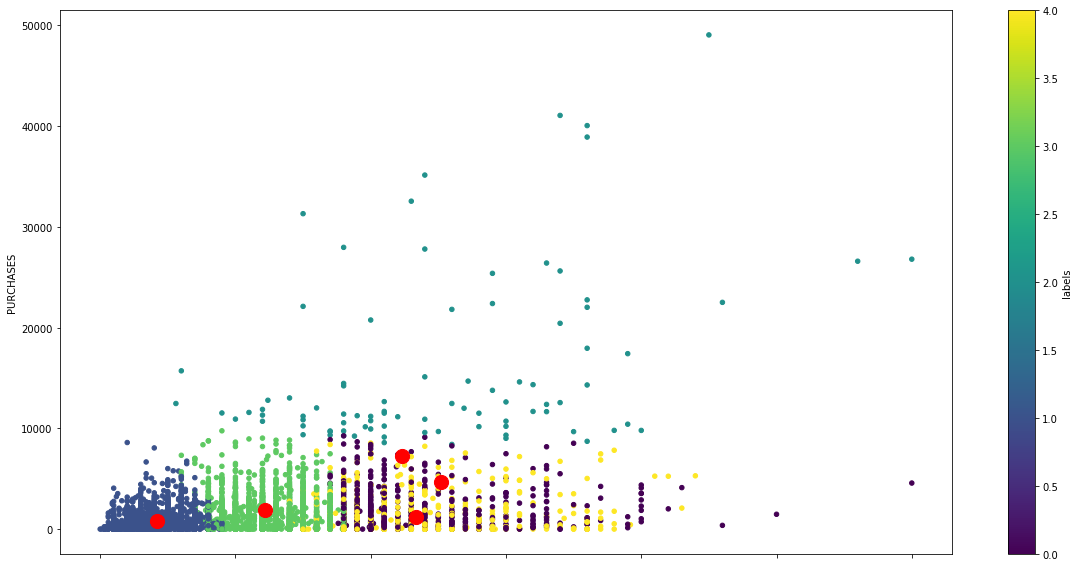

In [26]:
new_data.plot.scatter(x='CREDIT_LIMIT', 
                      y='PURCHASES', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))

centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='red')

In [27]:
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,CREDIT_LIMIT,BALANCE,PURCHASES,labels
count,581.000000,581.000000,581.000000,581.0
mean,11670.654045,1156.244344,1814.171377,0.0
std,2856.763647,1331.270592,2017.613692,0.0
min,8500.000000,0.000000,0.000000,0.0
25%,10000.000000,123.089579,319.920000,0.0
50%,10500.000000,447.941813,1109.910000,0.0
75%,13000.000000,2206.463745,2673.730000,0.0
max,30000.000000,4766.360515,9249.730000,0.0


Cluster 0: Young Professionals

High credit limit, low balance, average purchases

In [28]:
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,CREDIT_LIMIT,BALANCE,PURCHASES,labels
count,5253.000000,5253.000000,5253.000000,5253.0
mean,2093.801108,775.483684,515.199056,1.0
std,974.780905,780.523802,755.207898,0.0
min,0.000000,0.000000,0.000000,1.0
25%,1200.000000,72.033516,2.000000,1.0
50%,2000.000000,542.051302,247.450000,1.0
75%,3000.000000,1250.394614,662.400000,1.0
max,4500.000000,3572.844689,8591.310000,1.0


Cluster 1: Budget Conscious

low credit limit, low balance, low purchases

In [29]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,CREDIT_LIMIT,BALANCE,PURCHASES,labels
count,89.000000,89.000000,89.000000,89.0
mean,12615.168539,4645.234124,15684.689663,2.0
std,5151.800240,3809.247335,8549.862473,0.0
min,2800.000000,348.342172,8403.170000,2.0
25%,9000.000000,1917.441126,10221.350000,2.0
50%,12000.000000,3123.339488,11681.640000,2.0
75%,16500.000000,6372.182817,17945.000000,2.0
max,30000.000000,19043.138560,49039.570000,2.0


Cluster 2: Elite

High credit limit, low balance, High purchases

In [30]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,CREDIT_LIMIT,BALANCE,PURCHASES,labels
count,2464.000000,2464.000000,2464.000000,2464.0
mean,6101.984947,1921.575173,1247.773502,3.0
std,1293.783505,1734.139542,1573.423799,0.0
min,3000.000000,0.000000,0.000000,3.0
25%,5000.000000,252.546989,93.240000,3.0
50%,6000.000000,1563.547288,673.700000,3.0
75%,7000.000000,3258.988388,1815.185000,3.0
max,9000.000000,6832.111113,9751.900000,3.0


Cluster 3: Average Joes

Average credit limit, Average balance, Average purchases

In [31]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,CREDIT_LIMIT,BALANCE,PURCHASES,labels
count,563.000000,563.000000,563.000000,563.0
mean,11160.568384,7297.458065,1328.344156,4.0
std,2943.603844,2245.113076,1859.675652,0.0
min,7000.000000,4007.610043,0.000000,4.0
25%,9000.000000,5724.426508,0.000000,4.0
50%,10500.000000,6886.213231,410.240000,4.0
75%,12500.000000,8189.939207,1868.545000,4.0
max,22000.000000,18495.558550,8533.540000,4.0


Cluster 4: One day Millionaire

High credit limit, High balance, low purchases